# Introduction to Data Mining - Project 3
ID: 1912360

Name: ANCHAERIN

### 1) 필요한 모듈 임포트, 데이터 적재
 - 데이터 적재는 sklearn의 load_boston()을 사용

In [26]:
# code for 1)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boston=load_boston()

X_train_full,X_test,y_train_full,y_test=train_test_split(boston.data,boston.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

### 2) 모델 정의 및 학습 (30 epoch)

In [130]:
# code for 2)
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)

Epoch 1/30
9/9 [==============================] - 0s 14ms/step - loss: 225.6877 - val_loss: 55.0720
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 26.0017 - val_loss: 32.0978
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 20.3835 - val_loss: 28.8239
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 15.2714 - val_loss: 26.7011
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 14.1709 - val_loss: 30.2423
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 15.7797 - val_loss: 25.4508
Epoch 7/30
9/9 [==============================] - 0s 3ms/step - loss: 12.7917 - val_loss: 21.4456
Epoch 8/30
9/9 [==============================] - 0s 3ms/step - loss: 12.1288 - val_loss: 22.0052
Epoch 9/30
9/9 [==============================] - 0s 3ms/step - loss: 11.5533 - val_loss: 22.1582
Epoch 10/30
9/9 [==============================] - 0s 3ms/step - loss: 10.9632 - val_loss: 22.7104
Epoch 11/30
9/9 [

### 3) 학습 완료 후 손실 그래프 그리기

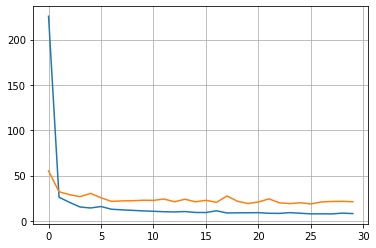

In [131]:
# code for 3)
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

### 3) 테스트 셋을 적용하여 예측값 구하기, 실젯값과 예측값의 비교 그래프 그리기

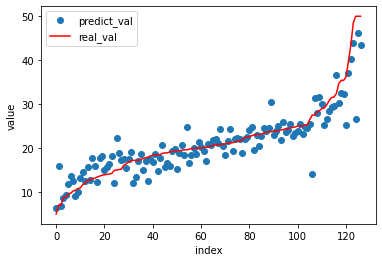

In [128]:
# code for 4)
import numpy as np
y_pred=model.predict(X_test)
sort_idx=np.argsort(y_test)
plt.plot(y_pred[sort_idx],'o',label='predict_val')
plt.plot(y_test[sort_idx],'r',label='real_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

real value인 X_test를 오름차순으로 정렬하고 정렬된 index(sort_idx)를 활용하여 그래프를 실제값과 예측값의 비교 그래프를 그렸다.